# Introduction

Great! Hope that you have a good overview of how to build a basic artificial neural network in Keras. In this assignment, you'll build your own neural network to classify images of the fashion MNIST dataset

# The Fashion MNIST Dataset

The fashion MNIST dataset is a dataset containing 70000 pictures of different clothing items. Each picture is a 28 x 28 pixel image, and belongs to one of 10 differnt classes. The dataset contains 60000 pictures for training and 10000 pictures for testing

Each training and test example is assigned to one of the following labels:

0:	T-shirt/top

1:	Trouser

2:	Pullover

3:	Dress

4:	Coat

5:	Sandal

6:	Shirt

7:	Sneaker

8:	Bag

9:	Ankle boot

Please go through this link to understand the dataset better:
https://github.com/zalandoresearch/fashion-mnist

# Loading the Fashion MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

A couple of datasets can easily be loaded into numpy arrays from keras, fashion MNIST being one of them. To store them we simply do the following:

In [2]:
import tensorflow as tf
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We see that the training data has 60000 examples with each picture being a 28 x 28 image. So the entire training data is stored as a 60000 x 28 x 28 numpy array. Similary, the test set has 10000 examples



# Visualizing some of the images

To represent the matrix of pixels as an image, we use the matplotlib *imshow()* function. Feel free to change the range of images and see the images of the test set too

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


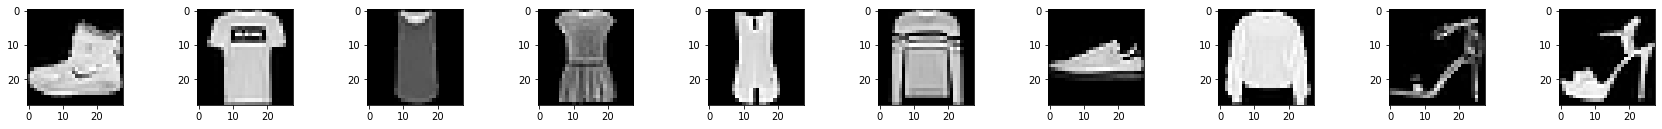

In [4]:
n = 10
plt.figure(figsize=(30, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(X_train[i])
    print(X_train[i].shape)
    pass

# **Data Preprocessing**

## Reshaping the matrices

Each training and testing example is a 28 x 28 matrix. The entire dataset is a 3 dimensional numpy array. However, to train the dataset as a whole in an ANN, we need a 2 dimensional array. Reshape X_train and X_test so that they are 2 dimensional, with number of rows being intact. The number of columns has to be set by you. (Hint: 28 x 28 image has to be reshaped into one dimension)

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Normalizing the data

Previously we used standardization of data, which is performing the mathematical operation $$\frac{X-\mu}{\sigma}$$ on each feature.

Now we will be *normalizing data* which is equivalent to performing the mathematical operation $$ \frac{X - X_{min}}{X_{max} - X_{min}} $$ on each feature.

Use scikit learn's MinMaxScaler to normalize the data. Feel free to Google the answer.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## One hot encoding of labels

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype=np.uint8)
y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype=np.uint8)

# **MAKING THE NEURAL NETWORK MODEL**

We now leave the task of making an appropriate neural network model upto you. Use the Sequential model and tweak the number of layers, number of neurons, regularization , dropout rate and other stuff until you get a fairly accurate model. Remember to solve overfitting as much as possible.

In [9]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=784,))
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1

In [12]:
model.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=16,
                    epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.8965 - accuracy: 0.6935 - val_loss: 0.5119 - val_accuracy: 0.8137
Epoch 2/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.6772 - accuracy: 0.7737 - val_loss: 0.5056 - val_accuracy: 0.8187
Epoch 3/200
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6418 - accuracy: 0.7855 - val_loss: 0.4831 - val_accuracy: 0.8313
Epoch 4/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6236 - accuracy: 0.7925 - val_loss: 0.4648 - val_accuracy: 0.8347
Epoch 5/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.6035 - accuracy: 0.7983 - val_loss: 0.4518 - val_accuracy: 0.8403
Epoch 6/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.5852 - accuracy: 0.8050 - val_loss: 0.4579 - val_accuracy: 0.8369
Epoch 7/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5717 - accuracy: 0.8097 - val_loss: 0.4467 - val_ac

3750/3750 [==============================] - 6s 2ms/step - loss: 0.4757 - accuracy: 0.8418 - val_loss: 0.4084 - val_accuracy: 0.8562
Epoch 114/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4698 - accuracy: 0.8435 - val_loss: 0.4053 - val_accuracy: 0.8593
Epoch 115/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4698 - accuracy: 0.8428 - val_loss: 0.4149 - val_accuracy: 0.8548
Epoch 116/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4696 - accuracy: 0.8426 - val_loss: 0.4100 - val_accuracy: 0.8575
Epoch 117/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4715 - accuracy: 0.8430 - val_loss: 0.4161 - val_accuracy: 0.8552
Epoch 118/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4727 - accuracy: 0.8412 - val_loss: 0.4150 - val_accuracy: 0.8576
Epoch 119/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4683 - accuracy: 0.8431 - val_loss: 0.4119 - val_ac

Epoch 169/200
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4611 - accuracy: 0.8453 - val_loss: 0.4047 - val_accuracy: 0.8573
Epoch 170/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4666 - accuracy: 0.8450 - val_loss: 0.4069 - val_accuracy: 0.8556
Epoch 171/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4646 - accuracy: 0.8438 - val_loss: 0.4126 - val_accuracy: 0.8560
Epoch 172/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4644 - accuracy: 0.8459 - val_loss: 0.4125 - val_accuracy: 0.8541
Epoch 173/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4665 - accuracy: 0.8450 - val_loss: 0.4079 - val_accuracy: 0.8595
Epoch 174/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4650 - accuracy: 0.8427 - val_loss: 0.4082 - val_accuracy: 0.8596
Epoch 175/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4601 - accuracy: 0.8458 - val_loss: 0

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Testing Loss')
plt.legend(loc='upper right')

In [15]:
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
         color='green', label='Testing Accuracy')
plt.legend(loc='lower right')

# NEURAL NETWORK WITH REGULARIZATION

Now make a neural network model with l2 regularization. Add batch normalization and see if it helps. Please name the Sequential model with something other than "model"

In [16]:
model1 = tf.keras.Sequential(name="Regularization")
model1.add(tf.keras.Input(shape=784,))
model1.add(tf.keras.layers.Dense(units=30, activation='relu',
                                 activity_regularizer=tf.keras.regularizers.l2(0.01),name='block_1'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(units=50, activation='relu',
                                 activity_regularizer=tf.keras.regularizers.l2(0.01),name='block_2'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(units=25, activation='relu',
                                 activity_regularizer=tf.keras.regularizers.l2(0.01),name='block_3'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model1.summary()

Model: "Regularization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
block_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)                200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
block_3 (Dense)              (None, 25)             

In [18]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [19]:
history1 = model1.fit(X_train,y_train,batch_size=16,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
3750/3750 [==============================] - 8s 2ms/step - loss: 1.3059 - accuracy: 0.6128 - val_loss: 0.8272 - val_accuracy: 0.7390
Epoch 2/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.0701 - accuracy: 0.6344 - val_loss: 0.7103 - val_accuracy: 0.7668
Epoch 3/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.0034 - accuracy: 0.6482 - val_loss: 0.7095 - val_accuracy: 0.7615
Epoch 4/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.9853 - accuracy: 0.6532 - val_loss: 0.8038 - val_accuracy: 0.7170
Epoch 5/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.9650 - accuracy: 0.6597 - val_loss: 0.8066 - val_accuracy: 0.6920
Epoch 6/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.0053 - accuracy: 0.6425 - val_loss: 0.6769 - val_accuracy: 0.7767
Epoch 7/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.9515 - accuracy: 0.6694 - val_loss: 0.6753 - val_ac

3750/3750 [==============================] - 7s 2ms/step - loss: 1.1344 - accuracy: 0.5773 - val_loss: 0.8251 - val_accuracy: 0.6978
Epoch 114/200
3750/3750 [==============================] - 6s 2ms/step - loss: 1.2014 - accuracy: 0.5516 - val_loss: 0.8790 - val_accuracy: 0.7027
Epoch 115/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1605 - accuracy: 0.5723 - val_loss: 0.8528 - val_accuracy: 0.6928
Epoch 116/200
3750/3750 [==============================] - 6s 2ms/step - loss: 1.1704 - accuracy: 0.5621 - val_loss: 0.9034 - val_accuracy: 0.6737
Epoch 117/200
3750/3750 [==============================] - 6s 2ms/step - loss: 1.1438 - accuracy: 0.5752 - val_loss: 0.8751 - val_accuracy: 0.6813
Epoch 118/200
3750/3750 [==============================] - 6s 2ms/step - loss: 1.1452 - accuracy: 0.5775 - val_loss: 0.8733 - val_accuracy: 0.7113
Epoch 119/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1775 - accuracy: 0.5627 - val_loss: 0.9201 - val_ac

Epoch 169/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1793 - accuracy: 0.5625 - val_loss: 0.9769 - val_accuracy: 0.6274
Epoch 170/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.2006 - accuracy: 0.5530 - val_loss: 0.8392 - val_accuracy: 0.7097
Epoch 171/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1408 - accuracy: 0.5772 - val_loss: 0.8283 - val_accuracy: 0.7152
Epoch 172/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1388 - accuracy: 0.5777 - val_loss: 0.8491 - val_accuracy: 0.7055
Epoch 173/200
3750/3750 [==============================] - 11s 3ms/step - loss: 1.1459 - accuracy: 0.5780 - val_loss: 1.0001 - val_accuracy: 0.6493
Epoch 174/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.1904 - accuracy: 0.5559 - val_loss: 1.0529 - val_accuracy: 0.5878
Epoch 175/200
3750/3750 [==============================] - 7s 2ms/step - loss: 1.2019 - accuracy: 0.5452 - val_loss: 

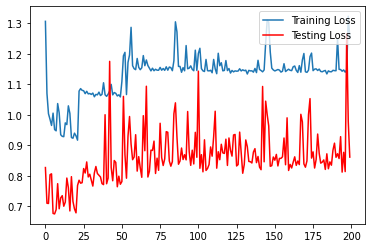

In [22]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], color='red', label='Testing Loss')
plt.legend(loc='upper right')

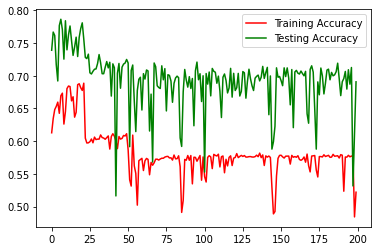

In [23]:
plt.plot(history1.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], color='green', label='Testing Accuracy')
plt.legend(loc='upper right')

# NEURAL NETWORK WITH DROPOUT 

Now implement the same neural network as above, but using dropout, and no regularization. Name the model differently.

In [24]:
model2 = tf.keras.Sequential(name="Dropout")
model2.add(tf.keras.Input(shape=784,))
model2.add(tf.keras.layers.Dense(units=32, activation='relu',name='block_1'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(units=64, activation='relu',name='block_2'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(units=128, activation='relu',name='block_3'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model2.summary()

Model: "Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
block_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
block_3 (Dense)              (None, 128)               8320

In [27]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [29]:
history2 = model2.fit(X_train,y_train,batch_size=16,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.8031 - accuracy: 0.7190 - val_loss: 0.5141 - val_accuracy: 0.8049
Epoch 2/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5975 - accuracy: 0.7919 - val_loss: 0.4480 - val_accuracy: 0.8405
Epoch 3/200
3750/3750 [==============================] - 11s 3ms/step - loss: 0.5649 - accuracy: 0.8034 - val_loss: 0.4364 - val_accuracy: 0.8413
Epoch 4/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5426 - accuracy: 0.8090 - val_loss: 0.4396 - val_accuracy: 0.8404
Epoch 5/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5268 - accuracy: 0.8166 - val_loss: 0.4672 - val_accuracy: 0.8294
Epoch 6/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5167 - accuracy: 0.8197 - val_loss: 0.4413 - val_accuracy: 0.8376
Epoch 7/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5091 - accuracy: 0.8219 - val_loss: 0.4227 - val_a

3750/3750 [==============================] - 7s 2ms/step - loss: 0.3968 - accuracy: 0.8598 - val_loss: 0.3783 - val_accuracy: 0.8643
Epoch 114/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3974 - accuracy: 0.8589 - val_loss: 0.3813 - val_accuracy: 0.8630
Epoch 115/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3965 - accuracy: 0.8575 - val_loss: 0.3753 - val_accuracy: 0.8653
Epoch 116/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3976 - accuracy: 0.8591 - val_loss: 0.3823 - val_accuracy: 0.8659
Epoch 117/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3943 - accuracy: 0.8611 - val_loss: 0.3836 - val_accuracy: 0.8615
Epoch 118/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3962 - accuracy: 0.8588 - val_loss: 0.3837 - val_accuracy: 0.8630
Epoch 119/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3942 - accuracy: 0.8619 - val_loss: 0.3790 - val_ac

Epoch 169/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3874 - accuracy: 0.8629 - val_loss: 0.3793 - val_accuracy: 0.8644
Epoch 170/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3845 - accuracy: 0.8640 - val_loss: 0.3824 - val_accuracy: 0.8619
Epoch 171/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3843 - accuracy: 0.8636 - val_loss: 0.3878 - val_accuracy: 0.8623
Epoch 172/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3843 - accuracy: 0.8624 - val_loss: 0.3813 - val_accuracy: 0.8650
Epoch 173/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3834 - accuracy: 0.8641 - val_loss: 0.3800 - val_accuracy: 0.8669
Epoch 174/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3852 - accuracy: 0.8636 - val_loss: 0.3806 - val_accuracy: 0.8604
Epoch 175/200
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3851 - accuracy: 0.8629 - val_loss: 0

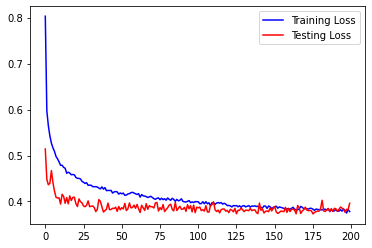

In [30]:
plt.plot(history2.history['loss'],color='blue',label='Training Loss')
plt.plot(history2.history['val_loss'],color='red', label='Testing Loss')
plt.legend(loc='upper right')

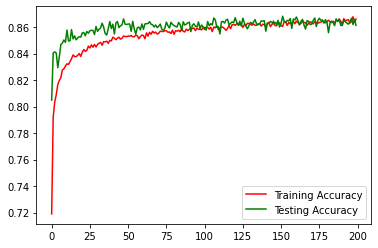

In [32]:
plt.plot(history2.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], color='green', label='Testing Accuracy')
plt.legend(loc='lower right')

# USING COMBINATION OF DIFFERENT OVERFITTING TECHNIQUES

Now use different combinations of overfitting techniques to get a good test accuracy.

In [15]:
from keras.models import Sequential,Input
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam,SGD

model4 = Sequential()

# Input Layer
model4.add(Input(shape=784,))

# First Layer
model4.add(Dense(units=32,name='block_1'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.3))

# Second layer
model4.add(Dense(units=64,name='block_2'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

# Third Layer
model4.add(Dense(units=128,name='block_3'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

# Fourth Layer
model4.add(Dense(units=256,name='block_4'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

# Output Layer
model4.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1

In [20]:
opt = Adam(lr=0.003)

model4.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history4 = model4.fit(X_train,y_train,
                      batch_size=16,
                      epochs=200,
                      validation_data=(X_test,y_test))

Epoch 1/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.9125 - accuracy: 0.6822 - val_loss: 0.5157 - val_accuracy: 0.8169
Epoch 2/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.7261 - accuracy: 0.7533 - val_loss: 0.5422 - val_accuracy: 0.8038
Epoch 3/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6849 - accuracy: 0.7669 - val_loss: 0.5010 - val_accuracy: 0.8211
Epoch 4/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6543 - accuracy: 0.7771 - val_loss: 0.4549 - val_accuracy: 0.8328
Epoch 5/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6347 - accuracy: 0.7847 - val_loss: 0.4456 - val_accuracy: 0.8385
Epoch 6/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6166 - accuracy: 0.7900 - val_loss: 0.4390 - val_accuracy: 0.8421
Epoch 7/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6040 - accuracy: 0.7940 - val_loss: 0.4302 - val_ac

3750/3750 [==============================] - 9s 2ms/step - loss: 0.5107 - accuracy: 0.8254 - val_loss: 0.3873 - val_accuracy: 0.8627
Epoch 58/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5191 - accuracy: 0.8216 - val_loss: 0.3948 - val_accuracy: 0.8597
Epoch 59/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5220 - accuracy: 0.8219 - val_loss: 0.4004 - val_accuracy: 0.8565
Epoch 60/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5163 - accuracy: 0.8243 - val_loss: 0.3876 - val_accuracy: 0.8608
Epoch 61/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5198 - accuracy: 0.8231 - val_loss: 0.3968 - val_accuracy: 0.8600
Epoch 62/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5115 - accuracy: 0.8246 - val_loss: 0.4094 - val_accuracy: 0.8499
Epoch 63/200
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5175 - accuracy: 0.8249 - val_loss: 0.3948 - val_accuracy

3750/3750 [==============================] - 7s 2ms/step - loss: 0.5001 - accuracy: 0.8287 - val_loss: 0.3905 - val_accuracy: 0.8610
Epoch 114/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5005 - accuracy: 0.8281 - val_loss: 0.3969 - val_accuracy: 0.8613
Epoch 115/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5000 - accuracy: 0.8303 - val_loss: 0.3878 - val_accuracy: 0.8618
Epoch 116/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4949 - accuracy: 0.8287 - val_loss: 0.3923 - val_accuracy: 0.8591
Epoch 117/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4967 - accuracy: 0.8306 - val_loss: 0.3911 - val_accuracy: 0.8643
Epoch 118/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5011 - accuracy: 0.8294 - val_loss: 0.3902 - val_accuracy: 0.8584
Epoch 119/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4992 - accuracy: 0.8292 - val_loss: 0.3889 - val_ac

Epoch 169/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4911 - accuracy: 0.8309 - val_loss: 0.3858 - val_accuracy: 0.8615
Epoch 170/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4908 - accuracy: 0.8331 - val_loss: 0.3828 - val_accuracy: 0.8614
Epoch 171/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4919 - accuracy: 0.8315 - val_loss: 0.3868 - val_accuracy: 0.8618
Epoch 172/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4902 - accuracy: 0.8345 - val_loss: 0.3839 - val_accuracy: 0.8619
Epoch 173/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4875 - accuracy: 0.8333 - val_loss: 0.3854 - val_accuracy: 0.8598
Epoch 174/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4927 - accuracy: 0.8319 - val_loss: 0.3817 - val_accuracy: 0.8645
Epoch 175/200
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4913 - accuracy: 0.8328 - val_loss: 0

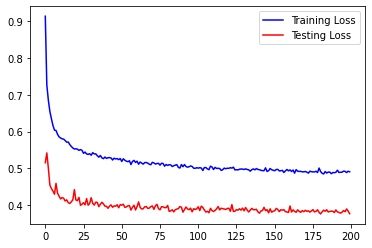

In [24]:
plt.plot(history4.history['loss'],color='blue',label='Training Loss')
plt.plot(history4.history['val_loss'],color='red', label='Testing Loss')
plt.legend(loc='upper right')

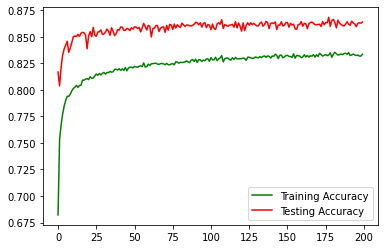

In [26]:
plt.plot(history4.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(history4.history['val_accuracy'],color='red', label='Testing Accuracy')
plt.legend(loc='lower right')

Great! Hope you had fun playing around with the neural network. With this you've come to the end of the artificial neural networks section. Note that there are different types of neural networks, with each performing well in different areas.

Happy Learning!